In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import datapackage
import scipy.stats as st
from sklearn import datasets
import numpy as np
import seaborn as sns
import json
plt.style.use('seaborn')





In [24]:
global_suicide_data = "master.csv"
global_suicide_data = pd.read_csv(global_suicide_data)


In [25]:
tiffany_copy=pd.read_csv('master.csv')
tiffany_copy_df = pd.DataFrame(tiffany_copy)
tiffany_copy_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [26]:
tiffany_clean = tiffany_copy_df[['country','year','sex','age','suicides_no','population']].groupby(['country']).sum().sort_values(by=['suicides_no'], ascending=False)
tiffany_clean

,year,suicides_no,population
country,,,
Russian Federation,648648,1209742,3690802620
United States,744000,1034013,8054027201
Japan,744000,806902,3681024844
France,719820,329127,1670756775
Ukraine,672192,319950,1286469184
...,...,...,...
Maldives,240612,20,2900246
Antigua and Barbuda,647832,11,1990228
San Marino,72048,4,78825


In [27]:
tiff_top_five = tiffany_copy_df[tiffany_copy_df['country'].isin(['Russian Federation','United States','Japan','France','Ukraine'])]
tiff_top_five_df= pd.DataFrame(tiff_top_five)
tiff_top_five_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9086,France,1985,male,75+ years,1522,1263200,120.49,France1985,0.741,"553,138,414,367",10765,G.I. Generation
9087,France,1985,male,55-74 years,2363,4471600,52.84,France1985,0.741,"553,138,414,367",10765,G.I. Generation
9088,France,1985,male,35-54 years,2752,6799400,40.47,France1985,0.741,"553,138,414,367",10765,Silent
9089,France,1985,male,25-34 years,1492,4240100,35.19,France1985,0.741,"553,138,414,367",10765,Boomers
9090,France,1985,female,75+ years,670,2434600,27.52,France1985,0.741,"553,138,414,367",10765,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,"18,120,714,000,000",60387,Silent
27218,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z


In [52]:
tiff_top_five_df = tiff_top_five_df.loc[(tiff_top_five_df['year']>=1990)&(tiff_top_five_df['year']<2016)]
tiff_top_five_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
9146,France,1990,male,75+ years,1441,1360900,105.89,France1990,0.779,"1,269,179,616,914",23968,G.I. Generation
9147,France,1990,male,55-74 years,1986,4746800,41.84,France1990,0.779,"1,269,179,616,914",23968,G.I. Generation
9148,France,1990,male,35-54 years,2816,7267500,38.75,France1990,0.779,"1,269,179,616,914",23968,Silent
9149,France,1990,male,25-34 years,1314,4289900,30.63,France1990,0.779,"1,269,179,616,914",23968,Boomers
9150,France,1990,female,75+ years,661,2583600,25.58,France1990,0.779,"1,269,179,616,914",23968,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,"18,120,714,000,000",60387,Silent
27218,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z


In [50]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=tiff_top_five['suicides_no'].quantile([.25,.50,.75])
iqr=quartiles[.75]-quartiles[.25] #iqr = Q3-Q1
min_outlier_value = quartiles[.25] - (1.5*iqr)
max_outlier_value = quartiles[.75] + (1.5*iqr)
outliers_values =tiff_top_five.loc[(tiff_top_five['suicides_no'] < min_outlier_value)|(tiff_top_five['suicides_no'] > max_outlier_value)]
print(f'Potential outliers are values below {np.round(min_outlier_value, decimals =2)} and greater than {np.round(max_outlier_value, decimals =2)}.')

Potential outliers are values below -2882.62 and greater than 5908.38.


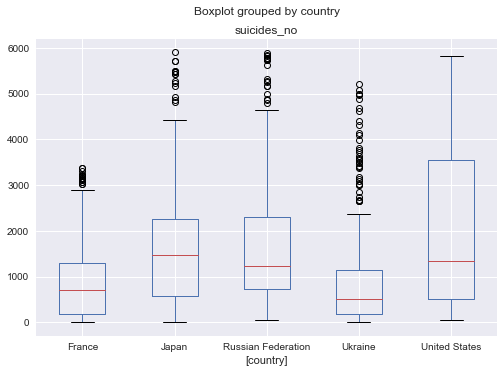

In [51]:
tiff_top_five_no_outliers=tiff_top_five.loc[tiff_top_five['suicides_no']<max_outlier_value]
tiff_top_five_no_outliers.boxplot(column=['suicides_no'],by=['country'])

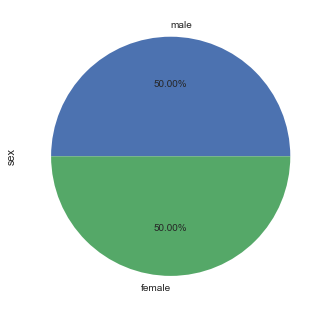

In [30]:
# Generate a pie plot showing the distribution of female versus male 
#using pandas
pie_chart=tiff_top_five_df['sex'].value_counts().plot.pie(autopct='%1.2f%%')
pie_chart

<Figure size 720x720 with 0 Axes>

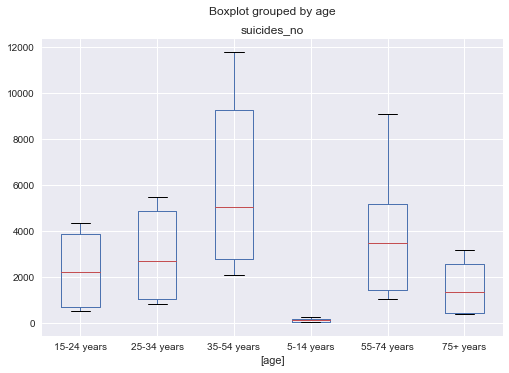

<Figure size 720x720 with 0 Axes>

In [43]:
# box plot of year versus number of suicides
tiff_usa= tiff_top_five.loc[tiff_top_five['country']=='United States']
tiff_usa.boxplot(column=['suicides_no'],by=['age'])
plt.figure(figsize=(10,10))


In [44]:
tiff_usa = tiff_usa.groupby('year').sum().reset_index()
tiff_usa_df = pd.DataFrame(tiff_usa)
tiff_usa_df

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,29446,220723000,184.72,10.092,236316
1,1986,30892,222953000,191.65,0.000,247056
2,1987,30783,225148000,191.66,0.000,259572
3,1988,30388,227353000,187.71,0.000,277236
4,1989,30218,229487000,182.44,0.000,295848
5,1990,30895,229952200,187.80,10.308,312048
6,1991,30790,232955000,183.77,0.000,318036
7,1992,30471,235565600,177.77,0.000,333120
8,1993,31084,238092300,179.12,0.000,346692
9,1994,31123,240614100,176.03,0.000,364500


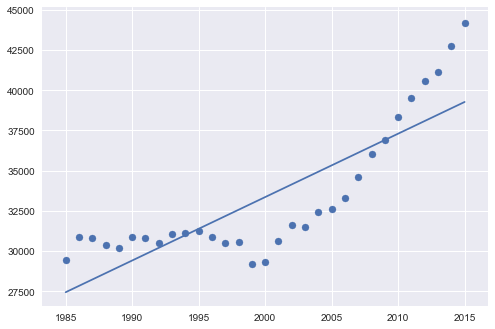

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tiff_usa_df['year'] ,tiff_usa_df['suicides_no'])
regression_values = tiff_usa_df['year'] *slope + intercept
plt.plot(tiff_usa_df['year'], regression_values)
plt.scatter(tiff_usa_df['year'] ,tiff_usa_df['suicides_no'])
plt.show()

In [48]:
print(f'The correlation coefficient for the number of suicides per year in the United States is {np.round(rvalue, decimals = 2)}')
print(f'The linear regression model is y =  {np.round(slope, decimals =2)} x +  {np.round(intercept, decimals =2)}')

The correlation coefficient for the number of suicides per year in the United States is 0.83
The linear regression model is y =  394.35 x +  -755336.68


In [ ]:
global_suicide_data.head()


In [ ]:
global_suicide_data.info()

In [ ]:
global_suicide_data.columns

In [ ]:
#clean columns
global_suicide_data=global_suicide_data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age'
                     ,'suicides_no':'SuicidesNo','population':'Population',
                      'suicides/100k pop':'Suicides/100kPop','country-year':'Country/Year',
                      'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYear($)',
                      'gdp_per_capita ($)':'GdpPerCapital($)','generation':'Generation'})

In [ ]:
#checking for null values
global_suicide_data.isnull().any()

In [ ]:
#count amount of null values
global_suicide_data.isnull().sum()

In [ ]:
global_suicide_data.drop('HDIForYear', axis=1, inplace = True)

In [ ]:
global_suicide_data.drop('Country/Year', axis=1, inplace=True)

In [ ]:
global_suicide_data = global_suicide_data[global_suicide_data.Year >= 2000]

In [ ]:
global_suicide_data["Year"].value_counts()

In [ ]:
#here we have dropped unneeded columns, as well as filtered the data
global_suicide_data.shape

In [ ]:
#create new data frame grouped by year to check
yearlyStats = global_suicide_data.groupby('Year').sum()
yearlyStats.sort()

In [ ]:
#Checkking countries for bad values
countryStats = global_suicide_data.groupby('Country').sum()
countryStats

In [ ]:
#dropping countries with bad data
country_1 = global_suicide_data['Country'] != 'Antigua'
country_2 = global_suicide_data['Country'] != 'Barbados'
country_3 = global_suicide_data['Country'] != 'Grenada'
country_4 = global_suicide_data['Country'] != 'Maldives'
country_5 = global_suicide_data['Country'] != 'Montenegro'
country_6 = global_suicide_data['Country'] != 'Saint Vincent'

country_all = country_1 | country_2 | country_3 | country_4 | country_5 | country_6
global_suicide_data= global_suicide_data[country_all]

In [ ]:
#removing 2016 due to being incomplete
global_suicide_data = global_suicide_data[global_suicide_data.Year != 2016]

In [ ]:
global_suicide_data.shape

In [ ]:
global_suicide_data.sample(10)

In [ ]:
global_suicide_data.Country.unique()

In [ ]:

#create lists of countries per continent
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'] 
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
northamerica = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
southamerica =  ['Argentina', 'Aruba', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Suriname', 'Trinidad and Tobago', 'Uruguay']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 
australiaoceania = ['Australia', 'Fiji', 'Kiribati', 'New Zealand']

In [ ]:
#move these to a dictionary of continents
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'North_America' for country in northamerica})
continents.update({country: 'South_America' for country in southamerica})
continents.update({country: 'Australia_Oceania' for country in australiaoceania})

In [ ]:
global_suicide_data.Country.unique()

In [ ]:
#map continents to countries
global_suicide_data['Continent'] = global_suicide_data['Country'].map(continents)

In [ ]:
global_suicide_data.shape

In [ ]:
data_per_year = global_suicide_data.groupby('Year').sum()
data_per_year['SuicidesNo']

In [ ]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.close()

In [ ]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

In [ ]:
curr = global_suicide_data.dropna().groupby(['Year']).sum().reset_index()
curr['per_100k'] = curr['SuicidesNo'] * 100000 / curr['Population']
plt.figure(figsize = (8,6))
plt.plot(curr['Year'], curr['per_100k'], label = "Suicide Rate")
plt.plot(curr['Year'], [curr['per_100k'].mean()] * len(curr), '--', label = "Mean")
plt.title("Global Suicide Rate from 1985 to 2015", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Suicide Rate per 100,000", fontsize = 14)
plt.legend()
plt.show()


In [ ]:
#group data by continent
data_per_continent = global_suicide_data.groupby('Continent').mean()
data_per_continent

In [ ]:
#plot mean suicides/year by continent
ax = data_per_continent['Suicides/100kPop'].plot(kind='bar', figsize=(15, 10), fontsize=14)
plt.title('Mean Suicides/Year by Continent', fontsize = 22)
ax.set_xlabel("Continent", fontsize=20)
ax.set_ylabel("Suicides/100k Population", fontsize=20)
plt.show()

In [ ]:

dftesting = global_suicide_data[['Continent','Year','Suicides/100kPop']]
dftesting

In [ ]:
dfAgg = dftesting.groupby(['Continent','Year'],sort=True,as_index=False)['Suicides/100kPop'].mean()

In [ ]:
#plotting mean suicide/100k by continent, year by year
by_cont = dfAgg.groupby('Continent')

for name, group in by_cont:
    plt.plot(group['Year'], group['Suicides/100kPop'], label=name, linewidth=6.0)
    

plt.title('Mean Suicide/100k, Year by Year, per Continent', fontsize = 22)
plt.ylabel('Suicides/100k', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
leg = plt.legend(fontsize = 12)
for line in leg.get_lines():
    line.set_linewidth(10)
plt.show

In [ ]:
#plotting countries with the highest suicide rate
data_suicide_mean = global_suicide_data['Suicides/100kPop'].groupby(global_suicide_data.Country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10))
plt.ylabel('Suicides/100k', fontsize = 20)
plt.xlabel('Country', fontsize = 20)

In [ ]:
#creating sub frame for USA only 
dfUSA = global_suicide_data[global_suicide_data.Country == 'United States']
usa_by_year = dfUSA.groupby('Year').sum()

In [ ]:
dfUSA.corr(method ='pearson')

In [ ]:
sns.heatmap(dfUSA.corr(method = 'pearson'),cmap='YlGnBu',annot=True)

In [ ]:
usa_by_year['Suicides/100kPop'].plot()
plt.title('USA Suicides Rate', fontsize = 22)
plt.ylabel('Suicides/100k Population', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

In [ ]:

#new data frame with only data from 2015
df2015 = global_suicide_data[global_suicide_data.Year == 2015]

In [ ]:
df2015 = df2015[['Country','Suicides/100kPop','GdpPerCapital($)', 'Continent']]

In [ ]:
df2015check = df2015.groupby('Country').sum()
df2015check

In [ ]:
df2015check['GdpPerCapital($)'] = df2015check['GdpPerCapital($)'].div(2)

In [ ]:
df2015check.reset_index(level=0, inplace=True)
df2015check

In [ ]:
sns.scatterplot(x='GdpPerCapital($)', y='Suicides/100kPop', data=df2015check, hue='Country',legend=False) 
plt.title('Suicide Rates: 2015')
plt.ylabel('Suicide Rate')
plt.xlabel('GDP')
plt.show()
# Checking data for rates

In [ ]:
df2015.shape

In [ ]:
dfcont = df2015.groupby(['Continent','Country'],sort=True,as_index=False)['Suicides/100kPop','GdpPerCapital($)'].sum()

In [ ]:
dfcont['GdpPerCapital($)'] = dfcont['GdpPerCapital($)'].div(2)
dfcont.reset_index(level=0, inplace=True)

In [ ]:
dfcont

In [ ]:
#plot suicide rate vs gdp
plt.figure(figsize=(20,16))
sns.scatterplot(x='GdpPerCapital($)',s=300, y='Suicides/100kPop',data=dfcont, hue='Continent') 
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP ($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1, prop={'size': 30})


plt.show()

In [ ]:
#regression plot for suicide rates vs gdp
plt.figure(figsize=(20,16))
sns.regplot(x="GdpPerCapital($)", y="Suicides/100kPop", data=dfcont, color = 'b')
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
curr = global_suicide_data.groupby(['Age']).sum().reset_index()
plt.bar(curr['Age'].values, curr['SuicidesNo'].values * 100000 / curr['Population'].values)
plt.title('Global Suicide Count per Age Group', fontsize = 14)
plt.xlabel('Age Group', fontsize = 14)
plt.ylabel('Suicide Count per 100,000', fontsize = 14)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
curr = global_suicide_data.groupby(['Year', 'Age']).sum().reset_index()
plt.figure(figsize = (8,6))
for age_group in curr['Age'].unique():
    sub = curr[curr['Age'] == age_group]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = age_group)

plt.title('Suicide count from 1985 - 2015', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicide Count per 100,000', fontsize = 14)
plt.legend()
plt.show()



In [ ]:
curr = global_suicide_data[(global_suicide_data['SuicidesNo'] != np.NaN) & (global_suicide_data['Population'] != np.NaN)]
curr = global_suicide_data.groupby(['Year', 'Gender']).sum().reset_index()
plt.figure(figsize = (8,6))
for sex in curr['Gender'].unique():
    sub = curr[curr['Gender'] == sex]
    sub['per_100k'] = sub['SuicidesNo'] * 100000 / sub['Population']
    plt.plot(sub['Year'], sub['per_100k'], label = sex)

plt.title('Suicide count based on Gender', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicide count per 100,000', fontsize = 14)
plt.ylim(bottom = 0)
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for sex in curr['Gender'].unique():
    sub = curr[curr['Gender'] == sex]
    plt.plot(sub['Year'], sub['SuicidesNo'], label = sex)

plt.title('Suicide count based on Gender', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total Suicide Count', fontsize = 14)
plt.ylim(bottom = 0)
plt.legend()
plt.show()

In [ ]:

# Generate pie plot showing the distribution of female versus male suicide percent
suicide_gender = global_suicide_data.groupby("Gender")

gender_suicide_percent = 100*suicide_gender['SuicidesNo'].sum()/global_suicide_data['SuicidesNo'].sum()
gender_suicide_percent

In [ ]:

# Pie Plot
suicide_vs_age = gender_suicide_percent.plot(kind='pie', y='Gender', title="Female Vs. Male Suicide Rate Percent (2000-2015)",\
                startangle=100, autopct='%1.1f%%',shadow=True, fontsize=20, colors =["r","b"],legend =False, explode =(0, 0.1))
plt.tight_layout()

plt.show()